# Hierarchial Clustering

### Getting Started

In [15]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import matplotlib.pyplot as plt
import seaborn as sns

### Import and Preprocess New Feature Engineered Dataset

In [2]:
df = pd.read_csv("../data/NewWordDifficulty.csv")
df.head()

,Word,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,PoS,SentimentScore
0,a,1,16.18,-0.01,0.73,1,-0.000000,DT,0.0
1,aah,3,5.40,0.21,0.62,2,0.918296,JJ,0.0
2,aaron,5,9.29,-0.11,0.97,3,1.921928,NN,0.0
3,aback,5,5.96,0.11,0.45,2,1.921928,NN,0.0
4,abacus,6,6.24,0.65,0.47,3,2.251629,NN,0.0


In [3]:
df = df.drop('PoS', axis=1)

In [4]:
# # One hot encode PoS column
# encoder = OneHotEncoder(sparse_output=False)
# encoded_data = encoder.fit_transform(df[['PoS']])
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PoS']))

# # Replace original PoS column
# df.drop('PoS', axis=1, inplace=True)
# df = pd.concat([df, encoded_df], axis=1)

In [5]:
df.set_index('Word', inplace=True)
df.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
Word,,,,,,,
a,1,16.18,-0.01,0.73,1,-0.000000,0.0
aah,3,5.40,0.21,0.62,2,0.918296,0.0
aaron,5,9.29,-0.11,0.97,3,1.921928,0.0
aback,5,5.96,0.11,0.45,2,1.921928,0.0
abacus,6,6.24,0.65,0.47,3,2.251629,0.0


### Hierarchial Clustering

In [ ]:
# dont forget standard scalar

In [6]:
def all_linkages(data):

    tree_cplt = linkage(data,method='complete')
    tree_avrg = linkage(data,method='average')
    tree_ward = linkage(data,method='ward')

    fig, axs = plt.subplots(3,1, figsize=(15,20))
    
    dendrogram_kwargs = {'truncate_mode': 'lastp', 
                         'p': 20, 
                         'leaf_rotation': 90.0,
                         'show_leaf_counts': False,
                         'show_contracted': True}

    dendrogram(tree_cplt, ax=axs[0], **dendrogram_kwargs)
    axs[0].set_title('Complete linkage')
    axs[0].set_xlabel('Word')
    axs[0].set_ylabel('Distance')

    dendrogram(tree_avrg, ax=axs[1], **dendrogram_kwargs)
    axs[1].set_title('Average linkage')
    axs[1].set_xlabel('Word')
    axs[1].set_ylabel('Distance')

    dendrogram(tree_ward, ax=axs[2], **dendrogram_kwargs)
    axs[2].set_title('Ward linkage');
    axs[2].set_xlabel('Word')
    axs[2].set_ylabel('Distance')

    plt.savefig('../outputs/heirarchial_clusterings.png')
    plt.show()
    
    return tree_cplt, tree_avrg, tree_ward

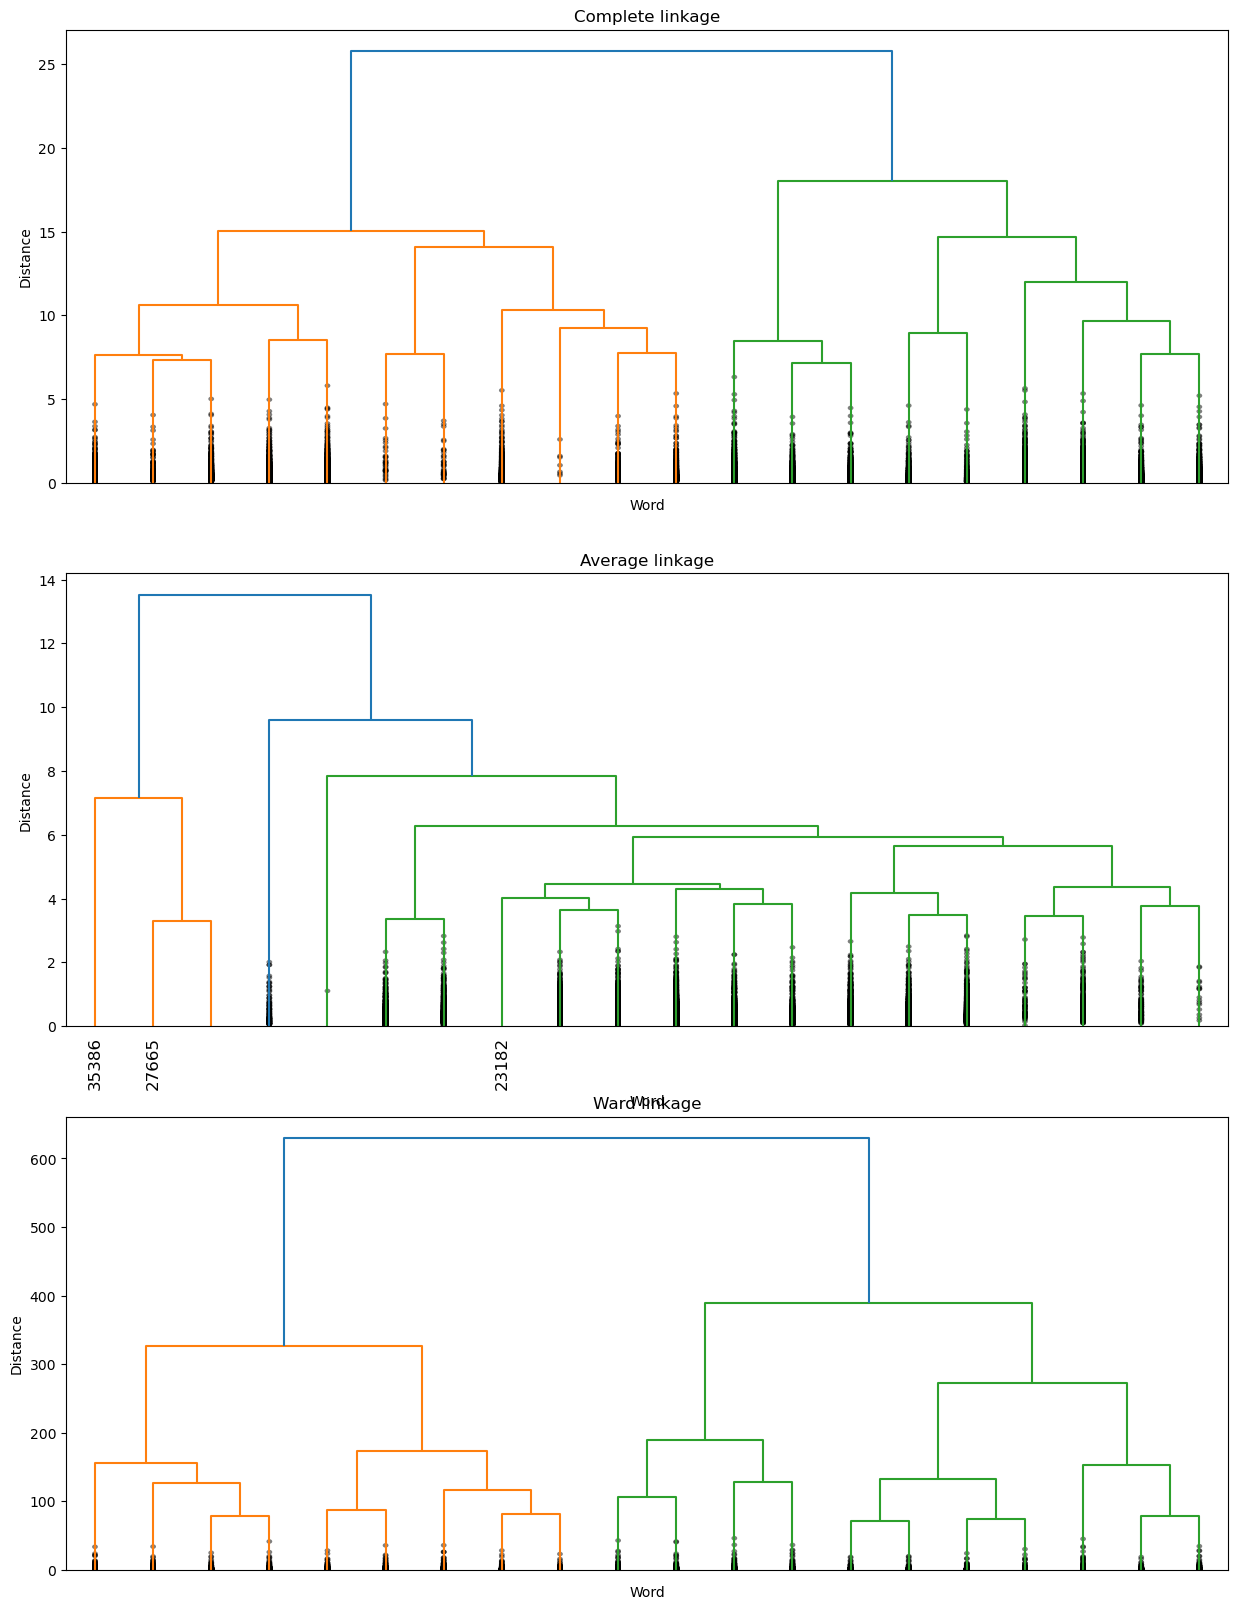

In [7]:
tree_cplt, tree_avrg, tree_ward = all_linkages(df)

In [8]:
import pickle
pickle.dump(tree_cplt, open('../outputs/tree_cplt.p', 'wb'))
pickle.dump(tree_avrg, open('../outputs/tree_avrg.p', 'wb'))
pickle.dump(tree_ward, open('../outputs/tree_ward.p', 'wb'))

In [16]:
cutoffs = [600, 300, 150, 75, 45, 20, 10, 5]
scores = []

for i in cutoffs:
    labels = fcluster(tree_ward, criterion='distance', t=i) 
    scores.append(silhouette_score(df, labels))

In [17]:
scores

[0.32676923650892137,
 0.24028259637121427,
 0.1672802082488092,
 0.18547312243176386,
 0.17689074001079494,
 0.21370921862352754,
 0.23248415664992583,
 0.2107716959482663]

In [18]:
cutoffs = [25, 12, 6, 3, 2]
cpt_scores = []

for i in cutoffs:
    labels = fcluster(tree_cplt, criterion='distance', t=i) 
    cpt_scores.append(silhouette_score(df, labels))

In [19]:
cpt_scores

[0.3377805828355738,
 0.16084340680689369,
 0.11458444088743029,
 0.11864808671040597,
 0.15861926953219804]

In [20]:
cutoffs = [12, 6, 3, 2]
avg_scores = []

for i in cutoffs:
    labels = fcluster(tree_avrg, criterion='distance', t=i) 
    avg_scores.append(silhouette_score(df, labels))

In [21]:
avg_scores

[0.6336521750115718,
 0.1392446380194371,
 0.14986592749992372,
 0.1377514655953588]

In [34]:
final_labels = fcluster(tree_cplt, criterion='distance', t=25)

In [35]:
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=2)
colors = pd.Categorical(final_labels).codes
colors = [palette[i] for i in colors]

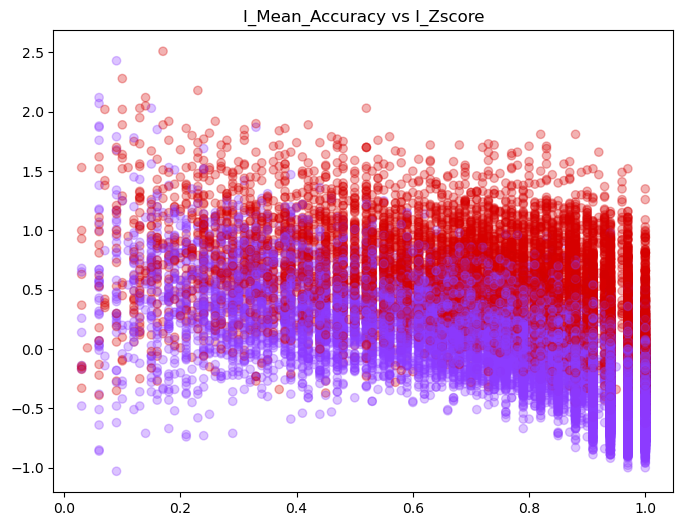

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['I_Mean_Accuracy'], df['I_Zscore'], c=colors, label=final_labels, alpha=0.3)
plt.title('I_Mean_Accuracy vs I_Zscore')
plt.show()

In [32]:
count = [0 ,0]
for i in final_labels:
    if i == 1:
        count[0] +=1
    else: count[1] +=1

In [33]:
count

[4, 39986]

In [ ]:
# appears very similar to kmeans(n=2) and its silhoute score